# Classification of Linear Systems

$$
    \dot{\bf x} = {\bf A x}
$$

**Theorem**. Let ${\bf A}\in\mathbb{R}^{2 \times 2}$, then there exists a non-singular ${\bf P}\in\mathbb{R}^{2\times 2}$ such that 

$$
    {\bf P}^{-1}{\bf A}{\bf P} = {\bf J}
$$

Where ${\bf J}$ is a Jordan canonical matrix, which take the following forms

$$
    {\bf J}_1 = \begin{bmatrix}
    \lambda_1 & 0 \\
    0 & \lambda_2 \\
    \end{bmatrix},
    \quad
    {\bf J}_2 = \begin{bmatrix}
    \lambda & 1 \\
    0 & \lambda \\
    \end{bmatrix}
    \quad
    {\bf J}_3 = \begin{bmatrix}
    \alpha & -\beta \\
    \beta & \alpha \\
    \end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

$$
\begin{align*}
    \dot{\bf x}_i &= ({\bf A x})_i\\
    &= \sum_{j} {\bf A}_{ij}{\bf x}_j
\end{align*}
$$

In [3]:
def linear_dynamics(A, vmin=-2, vmax=2, step=0.1):
    # The mpl streamplot requires the values of x to be equal
    X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
    X_dot = np.einsum("ij,jnm->inm", A, X)
    return X, X_dot

In [4]:
A = np.array([[4, 0], [1, 2]])
X, X_dot = linear_dynamics(A, step=0.05)

In [5]:
evals, evecs = eig(A)

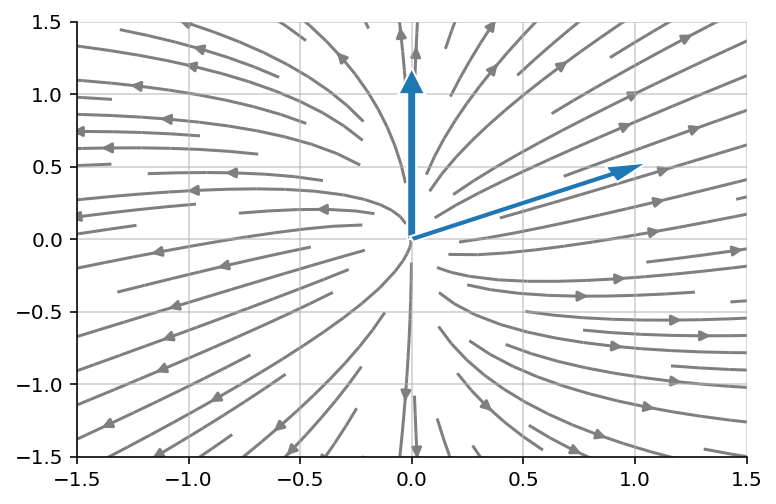

In [6]:
v1, v2 = evecs.T

plt.streamplot(*X, *X_dot, color="tab:gray", zorder=1)
plt.arrow(0, 0, *v1, width=0.04, edgecolor="white", zorder=2)
plt.arrow(0, 0, *v2, width=0.04, edgecolor="white", zorder=2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(alpha=0.6)

Streamplot from the perspective of the eigenvectors

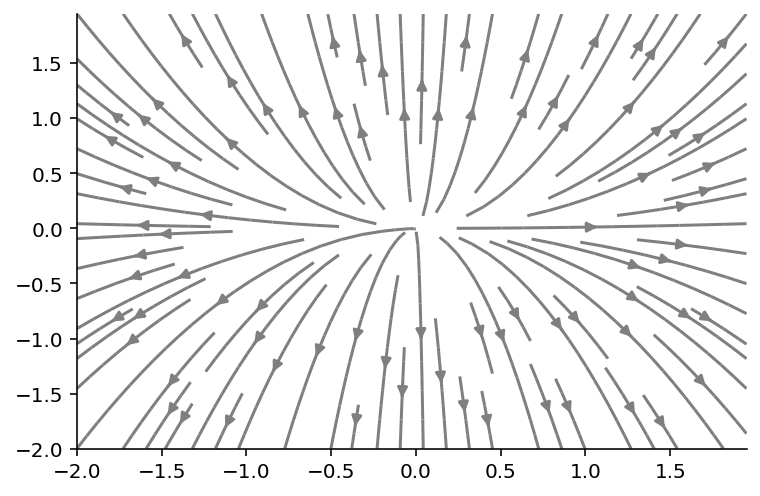

In [7]:
J = np.diag(evals)
X, X_dot = linear_dynamics(J, step=0.05)
plt.streamplot(*X, *X_dot, color="tab:gray", zorder=1)

## Jordan form 1:

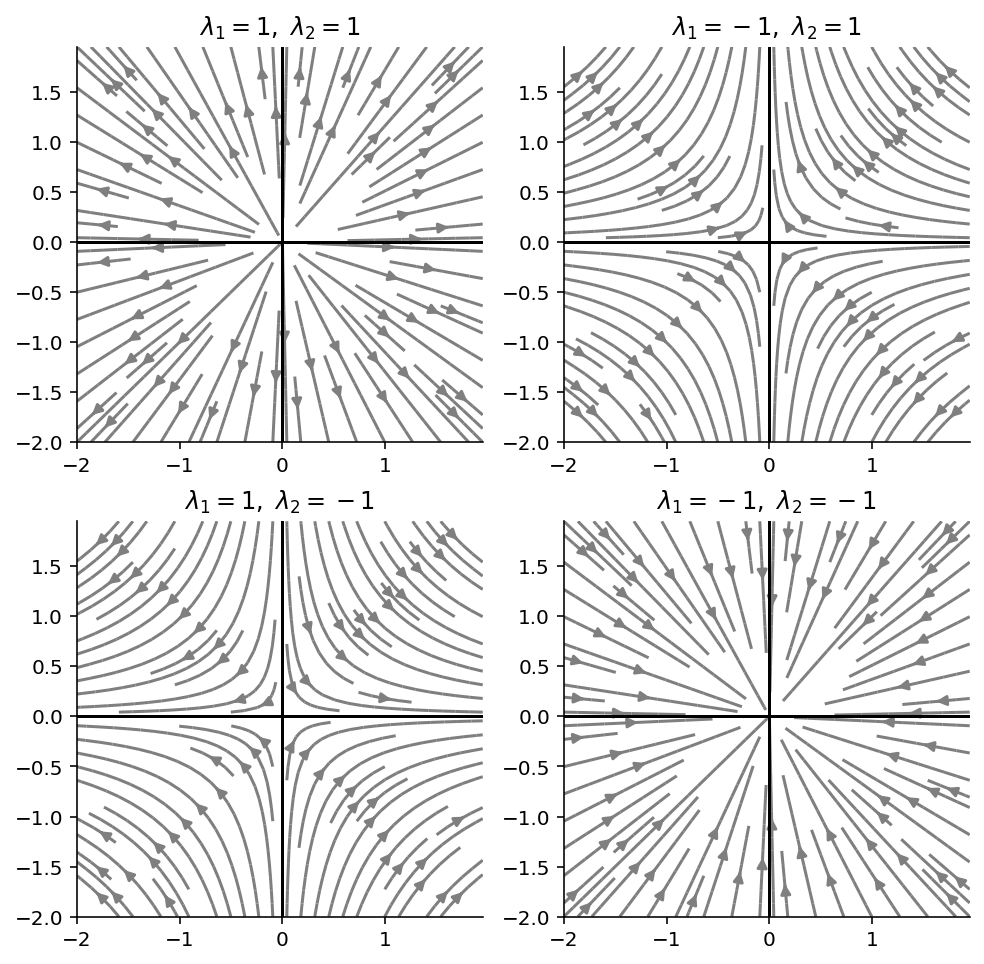

In [8]:
l_values = [(1, 1), (-1, 1), (1, -1), (-1, -1)]
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.ravel()
for axi, (l1, l2) in zip(ax, l_values):
    A = np.array([[l1, 0], [0, l2]])
    X, X_dot = linear_dynamics(A, step=0.05)
    axi.streamplot(*X, *X_dot, color="tab:gray")
    axi.set_title(rf"$\lambda_1={l1},\ \lambda_2={l2}$")
    axi.axhline(y=0, c="black")
    axi.axvline(x=0, c="black")

### Nodes on the ${\bf J}_1$ form



Consider $\text{sign}(\lambda_1) = \text{sign}(\lambda_2)$
* $\lambda_1 < \lambda_2$, the orbits are tangent to ${\bf v}_1$ (${\bf v}_2$ "pulls" harder than ${\bf v}_2$)
* $\lambda_1 > \lambda_2$, the orbits are tangent to ${\bf v}_2$ (${\bf v}_2$ "pulls" harder than ${\bf v}_1$)

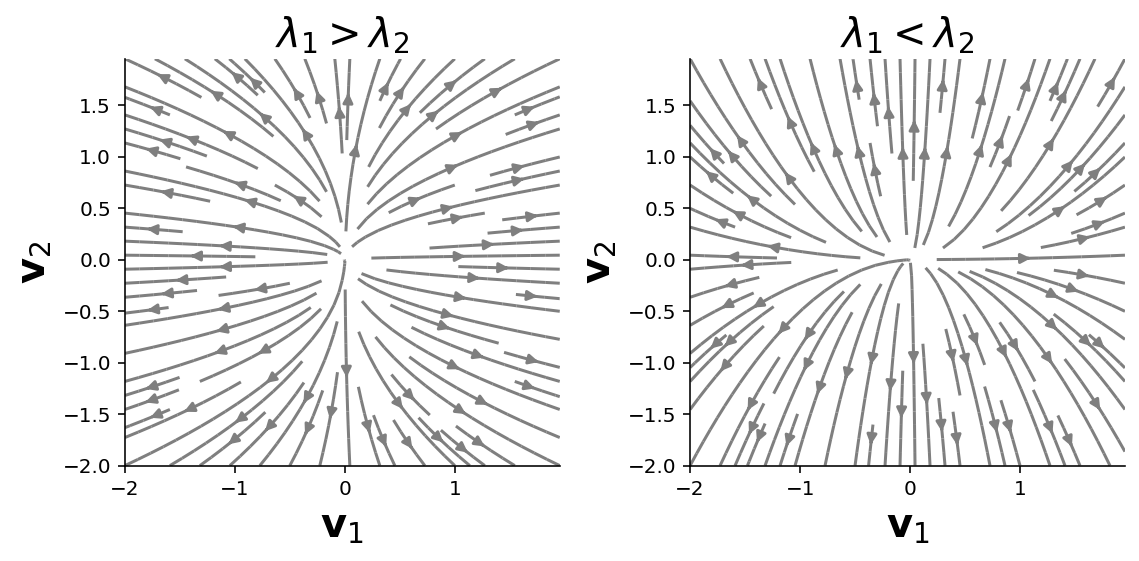

In [9]:
l_vals = [(2, 1), (1, 2)]

labels = (r"$\lambda_1 > \lambda_2$", r"$\lambda_1 < \lambda_2$")
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for axi, l12, lab in zip(ax, l_vals, labels):
    J = np.diag(l12)
    X, X_dot = linear_dynamics(J, step=0.05)
    axi.streamplot(*X, *X_dot, color="tab:gray", zorder=1)
    axi.set_xlabel(r"${\bf v}_1$", fontsize=20)
    axi.set_ylabel(r"${\bf v}_2$", fontsize=20)
    axi.set_title(lab, fontsize=20)
plt.tight_layout()

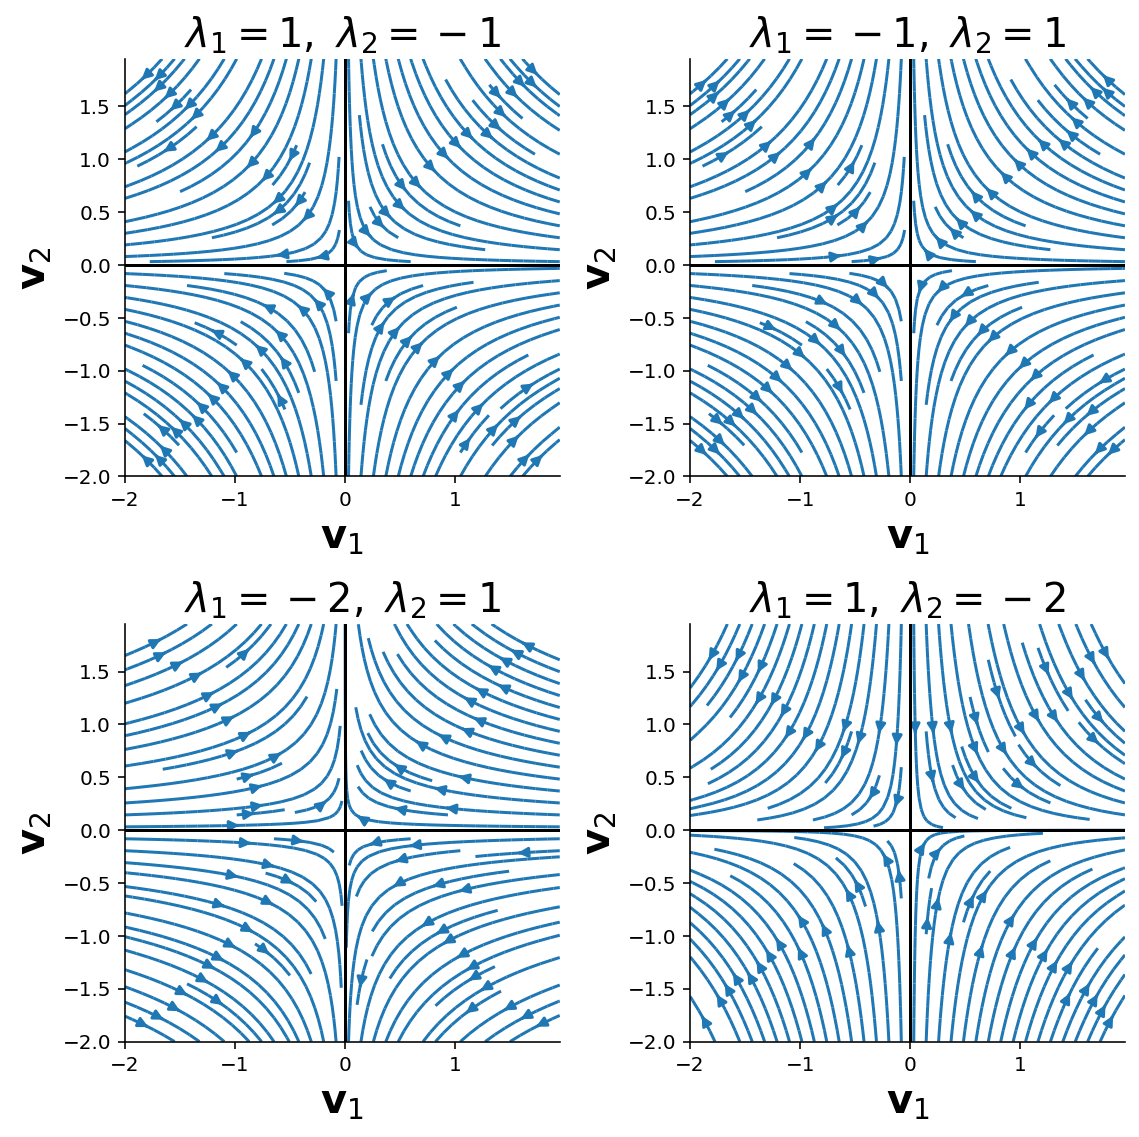

In [10]:
l_vals = [(1, -1), (-1, 1), (-2, 1), (1, -2)]

labels = [fr"$\lambda_1={l1},\ \lambda_2={l2}$" for l1, l2 in l_vals]
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.ravel()
for axi, l12, lab in zip(ax, l_vals, labels):
    J = np.diag(l12)
    X, X_dot = linear_dynamics(J, step=0.05)
    axi.streamplot(*X, *X_dot, color="tab:blue", zorder=1,
                   density=1.2)
    axi.set_xlabel(r"${\bf v}_1$", fontsize=20)
    axi.set_ylabel(r"${\bf v}_2$", fontsize=20)
    axi.set_title(lab, fontsize=20)
    axi.axhline(y=0, c="black", zorder=2)
    axi.axvline(x=0, c="black", zorder=2)
plt.tight_layout()

### Nodes on the ${\bf J}_2$ form



Consider $\text{sign}(\lambda_1) = \text{sign}(\lambda_2)$
* $\lambda_1 < \lambda_2$, the orbits are tangent to ${\bf v}_1$ (${\bf v}_2$ "pulls" harder than ${\bf v}_2$)
* $\lambda_1 > \lambda_2$, the orbits are tangent to ${\bf v}_2$ (${\bf v}_2$ "pulls" harder than ${\bf v}_1$)

## Eigenvalues and spirals/centres

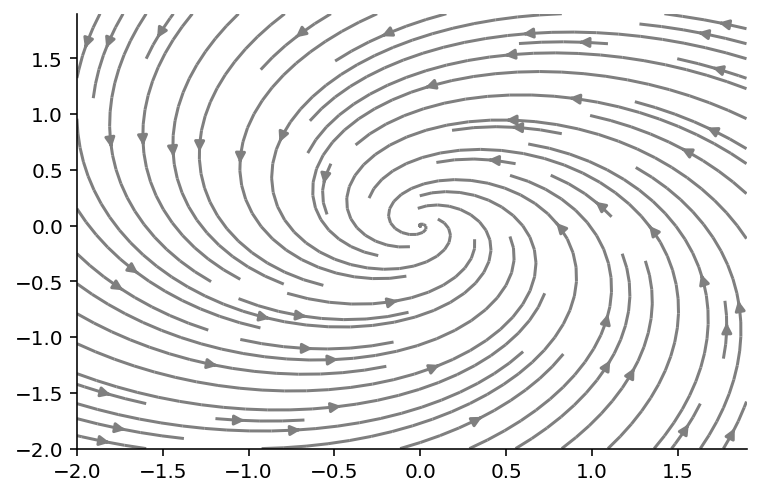

In [11]:
a, b = -1, 2
A = np.array([[a, -b], [b, a]])

vmin, vmax = -2, 2
step = 0.1
X = np.mgrid[vmin:vmax:step, vmin:vmax:step][::-1]
X_dot = np.einsum("ij,jnm->inm", A, X)
plt.streamplot(*X, *X_dot, color="tab:gray")

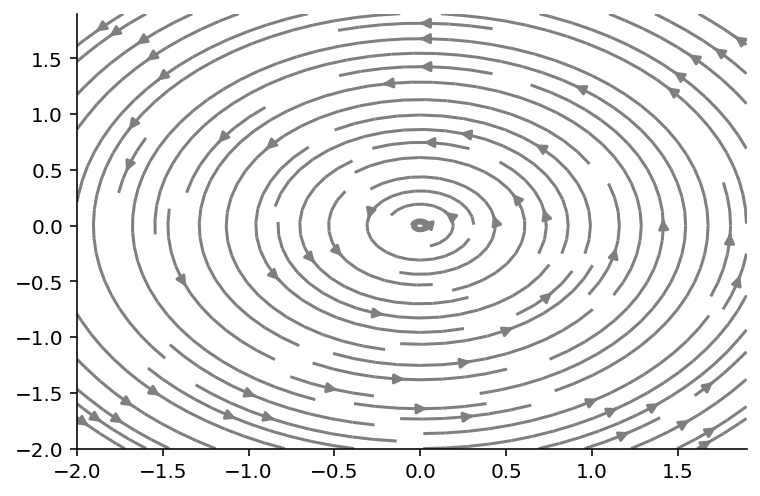

In [12]:
a, b = 0, 1
A = np.array([[a, -b], [b, a]])

X_dot = np.einsum("ij,jnm->inm", A, X)
plt.streamplot(*X, *X_dot, color="tab:gray")

In [13]:
eig(A)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

## Classification of the jacobian matrix

In [26]:
τ_min, τ_max = -6, 6
Δ_min, Δ_max = 0, 12
step = 0.05

Z = np.mgrid[Δ_min:Δ_max:step, τ_min:τ_max:step]
def eig1(X):
    Δ, τ = X
    discriminant = τ ** 2 - 4 * Δ
    
    if τ > 0 and discriminant < 0:
        val = 0
    elif τ > 0 and discriminant > 0:
        val = 1
    elif τ < 0 and discriminant < 0:
        val = 2
    elif τ < 0 and discriminant > 0:
        val = 3
    elif τ == 0 or discriminant == 0:
        val = -1
        
    return val

space = np.apply_along_axis(eig1, 0, Z)

In [27]:
def borderline(X):
    Δ, τ = X
    discriminant = τ ** 2 - 4 * Δ
    return discriminant

border_space = np.apply_along_axis(borderline, 0, Z)

(0.0, 11.950000000000001, -6.0, 5.950000000000001)

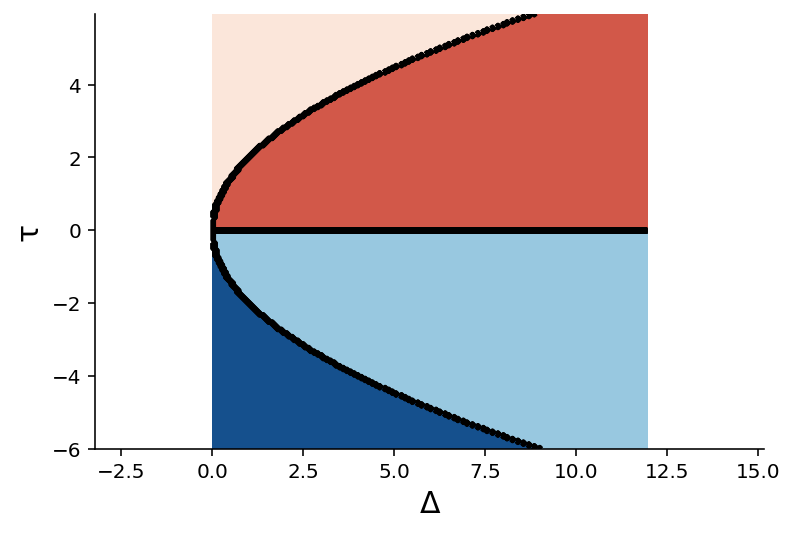

In [28]:
plt.contourf(*Z, space, cmap="RdBu")
plt.contour(*Z, np.isclose(border_space, 0, atol=1e-1), colors="black", linewidths=2)
plt.contour(*Z, np.isclose(Z[1], 0, atol=1e-2), colors="black")
plt.ylabel("τ", fontsize=15)
plt.xlabel("Δ", fontsize=15)
plt.axis("equal")